In [1]:
import fcsparser

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Importing Libraries

import fcsparser as fcsp
import re
import os
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC, SVR
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, normalize, LabelEncoder, MinMaxScaler
from sklearn.model_selection import StratifiedKFold, GridSearchCV, ParameterGrid, train_test_split, RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.decomposition import PCA


import random

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [17]:
# Importing data

def load_data(dir):
    print('---- loading data ---->')
    data = {}
    for dirname, _, filename in os.walk(dir):
        for file in filename:
            path = os.path.join(dirname, file)
            # Slicing in order to remove .fcs from filename
            f_name = ''.join(list(file)[:-4])
            data[f_name] = pd.DataFrame(fcsp.parse(path, meta_data_only=False, reformat_meta=True)[1])
    return data, fcsp.parse(path, meta_data_only=False, reformat_meta=True)[0]['_channels_']
 

'''
for dirname, _, filename in os.walk(HERE):
    for file in filename:
      path = os.path.join()
        meta = fcsparser.parse(, meta_data_only=True, reformat_meta=True)
'''

def prepData(x,scaler=None):
        """
        Normalize data
        """
        if not scaler:
                scaler = StandardScaler().fit(x)
        x_transformed= np.nan_to_num(np.array(scaler.transform(x)))
        return normalize(x_transformed),scaler

# Loading fcs file data into a dictionary
global path

dir = os.path.abspath(os.path.dirname('C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik\\CHD1_1.fcs'))
dir = os.path.join(dir, 'C:\\Users\\ankit\\Downloads\\FCM Data\\FCM Data For Kartik - Copy\\Combination')
data, channels = load_data(dir)

# Function to return list of different taken samples
def sample_list(det = data):
    return set([sample[0:3] for sample in det.keys()])


# Function to check the dimensions of our fcs files
def checkDimensions(data, dimensions):
    for sample in data:
        if data[sample].shape != dimensions: print(sample, data[sample].shape)
    return 



---- loading data ---->


In [18]:
data

{'CHD1_1':              FSC-A   FSC-H        SSC-A     FITC-A        PE-A   PE-Cy5-A  \
 0        96.800003   995.0  1552.320068   2.970000   63.360001  70.290001   
 1       252.800003   707.0  1641.420044  87.120003   38.610001  59.400002   
 2       248.000000   791.0  1152.359985 -89.099998 -523.710022   1.980000   
 3       229.600006   827.0   708.840027  58.410000    1.980000  39.599998   
 4       289.600006   800.0  1036.530029  26.730000 -621.720032  53.459999   
 ...            ...     ...          ...        ...         ...        ...   
 99995  1481.599976  1046.0   420.750000 -14.850000  319.769989  35.639999   
 99996   860.000000   891.0   544.500000 -46.529999 -237.600006 -22.770000   
 99997  2175.199951  1157.0  1025.640015 -58.410000  303.929993  14.850000   
 99998  1770.400024  1002.0   590.039978 -52.470001  258.390015  16.830000   
 99999  1089.599976  1051.0   530.640015 -51.480000 -340.559998  28.710001   
 
          PE-Cy7-A        APC-A   APC-Cy7-A  Pacific

In [96]:
checkDimensions(data,data[random.choice(list(data.keys()))].shape)

CMD4_1 (99906, 12)


In [28]:
#concatenating the dataframes of all triplicates -->
def triplicates_combined(data = data):
    deta = {}
    for key in data.keys():
        deta[key[:4]]= pd.concat([data[key[:4]+'_1'],data[key[:4]+'_2'],data[key[:4]+'_3']],axis=0)
    return deta

triplicates_combined()

{'CHD1':              FSC-A   FSC-H        SSC-A      FITC-A        PE-A     PE-Cy5-A  \
 0        96.800003   995.0  1552.320068    2.970000   63.360001    70.290001   
 1       252.800003   707.0  1641.420044   87.120003   38.610001    59.400002   
 2       248.000000   791.0  1152.359985  -89.099998 -523.710022     1.980000   
 3       229.600006   827.0   708.840027   58.410000    1.980000    39.599998   
 4       289.600006   800.0  1036.530029   26.730000 -621.720032    53.459999   
 ...            ...     ...          ...         ...         ...          ...   
 99995   453.600006   691.0  1041.479980  133.649994  -63.360001   -45.540001   
 99996   358.399994   816.0  1626.570068  -47.520000  146.520004  1256.310059   
 99997  2806.400146  2898.0  1939.410034   -4.950000  331.649994   -33.660000   
 99998   798.400024  1623.0  1729.530029 -180.180008 -955.350037    10.890000   
 99999   368.000000   738.0  1073.160034   76.230003 -200.970001   -13.860001   
 
          PE-Cy7-A

In [29]:
channels

,$PnN,$PnR,$PnB,$PnE,$PnV,$PnG
Channel Number,,,,,,
1,FSC-A,262144,32,"[0, 0]",478,1.0
2,FSC-H,262144,32,"[0, 0]",478,1.0
3,SSC-A,262144,32,"[0, 0]",324,1.0
4,FITC-A,262144,32,"[0, 0]",610,1.0
5,PE-A,262144,32,"[0, 0]",637,1.0
6,PE-Cy5-A,262144,32,"[0, 0]",606,1.0
7,PE-Cy7-A,262144,32,"[0, 0]",775,1.0
8,APC-A,262144,32,"[0, 0]",833,1.0
9,APC-Cy7-A,262144,32,"[0, 0]",715,1.0


In [30]:
data.keys()

dict_keys(['CHD1_1', 'CHD1_2', 'CHD1_3', 'CHD2_1', 'CHD2_2', 'CHD2_3', 'CHD3_1', 'CHD3_2', 'CHD3_3', 'CHD4_1', 'CHD4_2', 'CHD4_3', 'CHD5_1', 'CHD5_2', 'CHD5_3', 'CLD1_1', 'CLD1_2', 'CLD1_3', 'CLD2_1', 'CLD2_2', 'CLD2_3', 'CLD3_1', 'CLD3_2', 'CLD3_3', 'CLD4_1', 'CLD4_2', 'CLD4_3', 'CLD5_1', 'CLD5_2', 'CLD5_3', 'CMD1_1', 'CMD1_2', 'CMD1_3', 'CMD2_1', 'CMD2_2', 'CMD2_3', 'CMD3_1', 'CMD3_2', 'CMD3_3', 'CMD4_1', 'CMD4_2', 'CMD4_3', 'CMD5_1', 'CMD5_2', 'CMD5_3'])

In [31]:
Day_1 = dict([(key,data[key]) for key in data.keys() if key.endswith('_1')])
Day_1.keys()

dict_keys(['CHD1_1', 'CHD2_1', 'CHD3_1', 'CHD4_1', 'CHD5_1', 'CLD1_1', 'CLD2_1', 'CLD3_1', 'CLD4_1', 'CLD5_1', 'CMD1_1', 'CMD2_1', 'CMD3_1', 'CMD4_1', 'CMD5_1'])

In [ ]:
Day_1

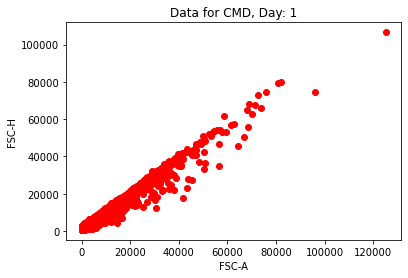

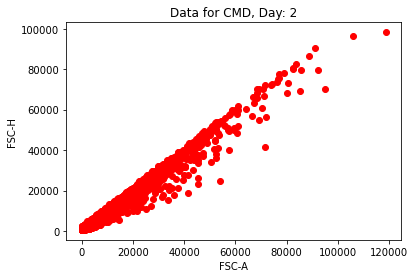

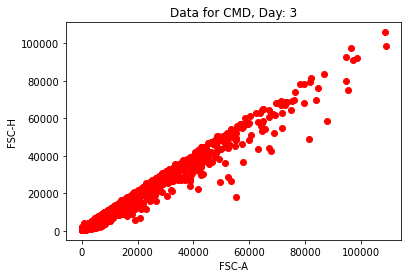

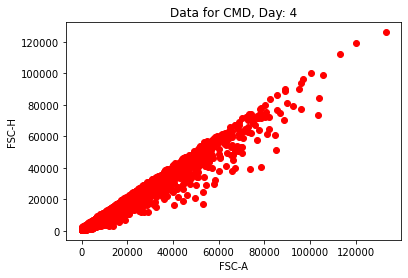

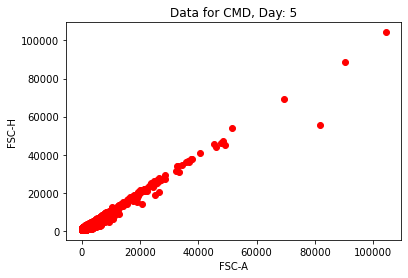

[None, None, None, None, None]

In [32]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'CMD',i) for i in range(1,6)]

(1499906, 12)


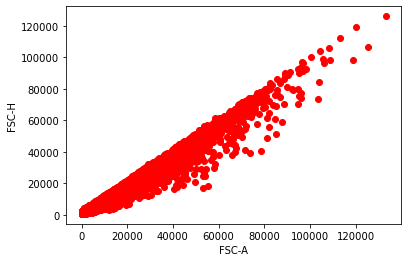

In [33]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('FSC-H')
    plt.show()

plot_sample(data,'CMD')

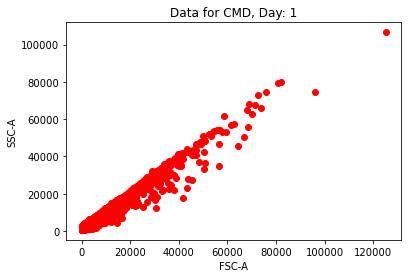

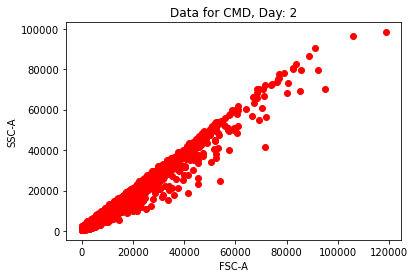

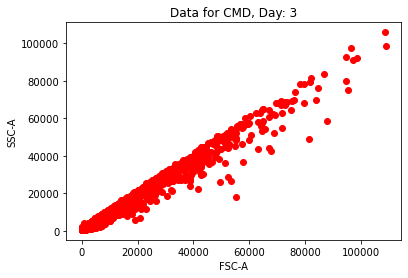

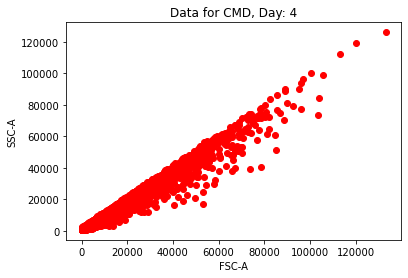

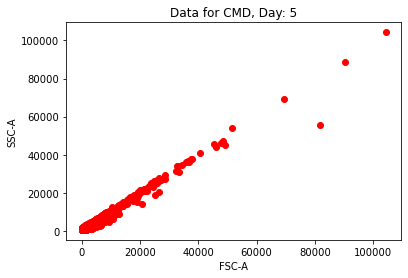

[None, None, None, None, None]

In [34]:
def plot_sample_data(data, key, day = 1):
    key = key[:3]
    plot = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)])
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.title(f'Data for {key}, Day: {day}')
    plt.show()
    

[plot_sample_data(data, 'CMD',i) for i in range(1,6)]

(1499906, 12)


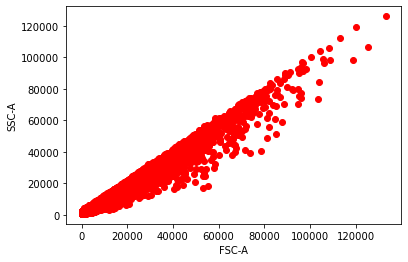

In [35]:
# function to plot combined data of all days(1-5) for a particular sample

def plot_sample(data, key):
    key = key[:3]
    original = pd.DataFrame()
    for day in range(1,6):
        l = pd.concat([data[key+str(day)+'_'+str(i)] for i in range(1,4)], axis = 0)
        original = pd.concat([original, l])
    plot = original
    print(plot.shape)
    plt.scatter(plot['FSC-A'],plot['FSC-H'], color = 'red')
    plt.xlabel('FSC-A')
    plt.ylabel('SSC-A')
    plt.show()

plot_sample(data,'CMD')

Cluster 1 Inertia 2943453233152.0
Cluster 2 Inertia 1296057630720.0
Cluster 3 Inertia 939956109312.0
Cluster 4 Inertia 654905966592.0
Cluster 5 Inertia 518667141120.0
Cluster 6 Inertia 440650661888.0
Cluster 7 Inertia 390838976512.0
Cluster 8 Inertia 351315886080.0
Cluster 9 Inertia 321959165952.0
Cluster 10 Inertia 301629210624.0
Cluster 11 Inertia 279000547328.0
Cluster 12 Inertia 261586010112.0
Cluster 13 Inertia 244349550592.0
Cluster 14 Inertia 233401712640.0
Cluster 15 Inertia 218331987968.0
Cluster 16 Inertia 207983362048.0
Cluster 17 Inertia 197564776448.0
Cluster 18 Inertia 190573690880.0
Cluster 19 Inertia 177936007168.0


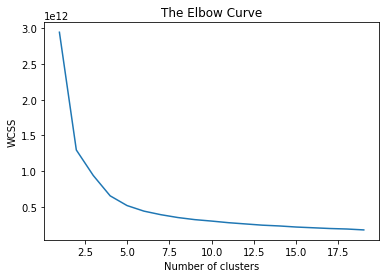

In [73]:
def elbow_curve(sample = sample):
    wcss = []
    for i in range(1,20):
      kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
      kmeans.fit(sample)
      wcss.append(kmeans.inertia_)
      print('Cluster', i, 'Inertia', kmeans.inertia_,)
    plt.plot(range(1,20),wcss)
 
    plt.title('The Elbow Curve')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
    plt.show()

elbow_curve()

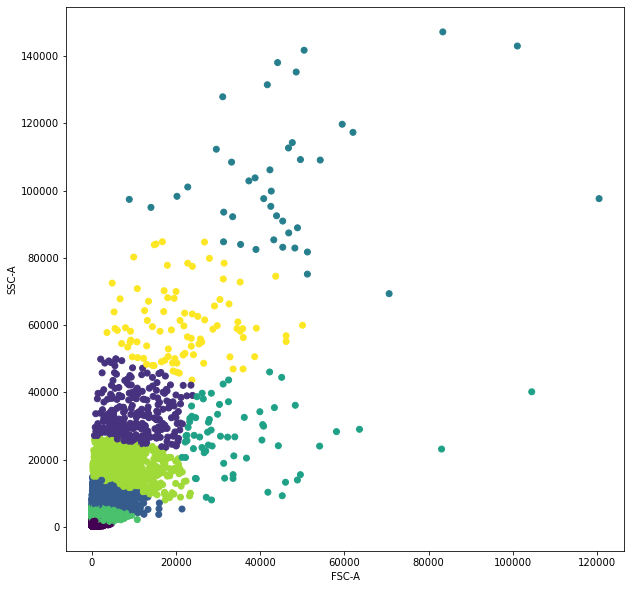

In [48]:
# Running Clustering with feature vector of size 3 in place of 3000 feature vector

num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['SSC-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("SSC-A")

plt.show()


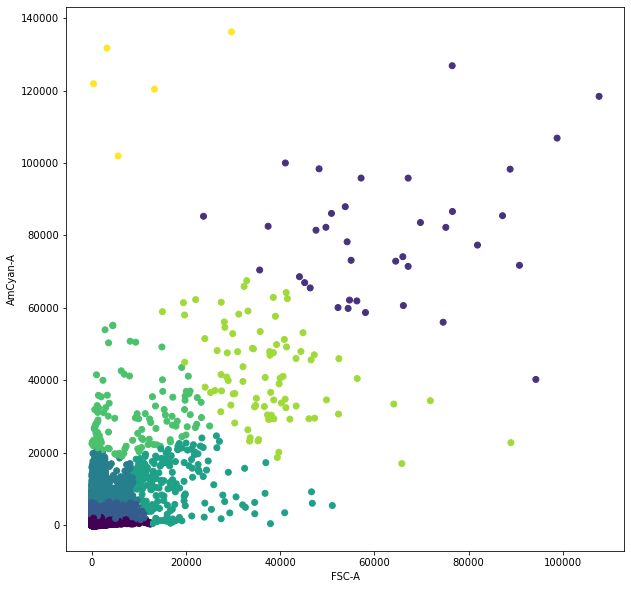

In [49]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['FSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A")
plt.ylabel("AmCyan-A")
plt.show()

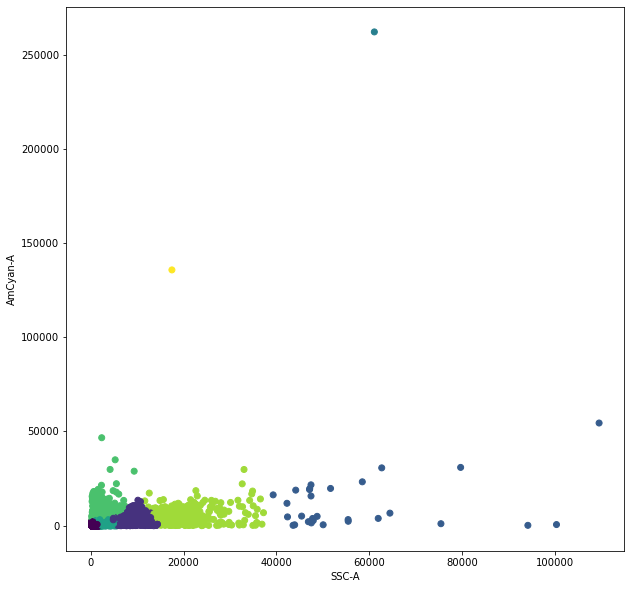

In [50]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111)
ax.scatter(sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("SSC-A")
plt.ylabel("AmCyan-A")
plt.show()

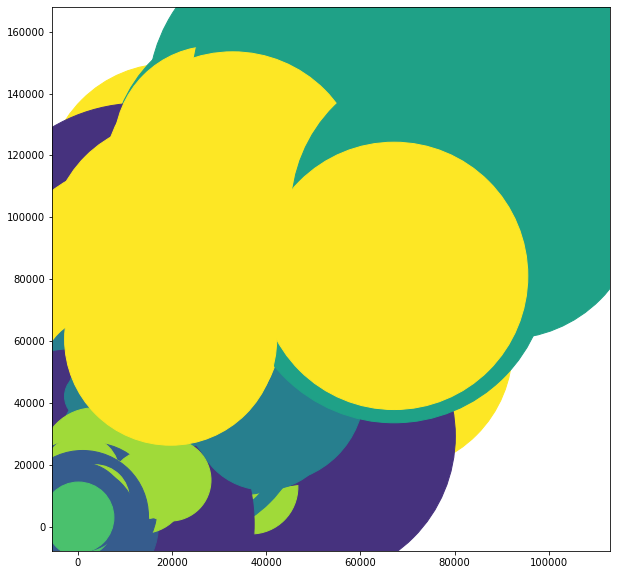

In [51]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 

plt.show()

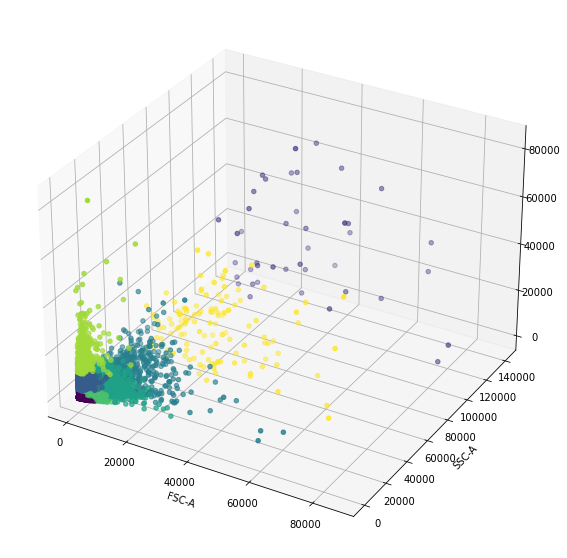

In [59]:
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)

plt.show()

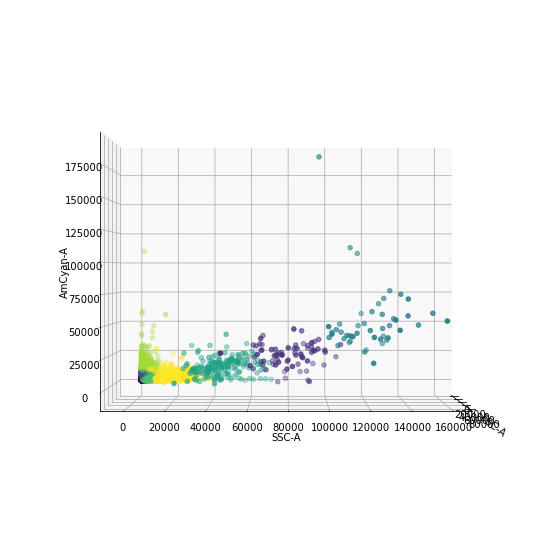

In [69]:
from mpl_toolkits import mplot3d
num_clusters = 8
cols2 = random.choice(list(data.keys()))
sample = data[cols2][['FSC-A','SSC-A','AmCyan-A']]
kmean = KMeans(n_clusters = num_clusters).fit(sample)
kmean.predict(sample)
klabels = kmean.labels_

#filter rows of original data

cluster_count1 = np.zeros(num_clusters)
for cluster in range(num_clusters):
    filter_lb = sample[klabels == cluster]


fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d' )
ax.view_init(0,0 )
ax.scatter(sample['FSC-A'],sample['SSC-A'],sample['AmCyan-A'],c = klabels) 
plt.xlabel("FSC-A", )
plt.ylabel("SSC-A",)
ax.set_zlabel('AmCyan-A')


plt.show()

In [74]:
from sklearn.metrics import silhouette_score